<a href="https://colab.research.google.com/github/kavin-create/Boilerplate_contactform_with-_django/blob/main/gb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install dtreeviz             # install dtreeviz for sklearn
!pip install dtreeviz[xgboost]    # install XGBoost related dependency
!pip install dtreeviz[pyspark]    # install pyspark related dependency
!pip install dtreeviz[lightgbm]   # install LightGBM related dependency
!pip install mlxtend
!pip install mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 876 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 371 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=01b384641e7f3d89d60997e2881048465e8f8eb492ab7b79ee402da8c8677094
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 41.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=2817640

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
#Single model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#Ensemble classifications models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix, classification_report, roc_auc_score,
f1_score, recall_score, precision_score, SCORERS)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mlxtend.classifier import StackingCVClassifier
import warnings
warnings.simplefilter('ignore')
from sklearn.pipeline import Pipeline
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
import matplotlib.pyplot as plt
from sklearn import tree
from dtreeviz.trees import *
import graphviz
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cleandata_td/resampled_data/'+'SMOTE+ENN'+'/2015RES.csv')
data


,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,TS
0,0,0.190476,0.623656,0.509804,0.771574,0.594595,0.409091,0.545977,0.217172,0.0
1,1,0.055556,0.403226,0.000000,0.989848,0.594595,0.363636,0.212644,0.067340,0.0
2,2,0.126984,0.483871,0.542484,0.725888,0.567568,0.636364,0.436782,0.217172,0.0
3,3,0.126984,0.623656,0.522876,0.751269,0.554054,0.227273,0.287356,0.158249,0.0
4,4,0.174603,0.543011,0.516340,0.817259,0.554054,0.500000,0.459770,0.158249,0.0
...,...,...,...,...,...,...,...,...,...,...
131,131,0.333333,0.494624,0.666667,0.568528,0.472973,0.863636,0.333333,0.158249,1.0
132,132,0.333333,0.516129,0.614379,0.639594,0.472973,0.772727,0.063218,0.067340,1.0
133,133,0.253968,0.467742,0.535948,0.680203,0.527027,0.863636,0.051724,0.000000,1.0
134,134,0.285714,0.440860,0.562092,0.710660,0.608108,0.772727,0.000000,0.000000,1.0


In [ ]:
X, y = data[['T',	'TM',	'Tm',	'SLP','H','VV','V','VM']], data['TS']
shap= data.shape[0]
n_neighbour= round(shap**(1/2))

In [ ]:
x=('SMOTE+NC','SMOTE+ENN','SMOTE','ROSE','ADASYN')
acc2=[[]for i in range(11)] #smote+enn
pre2=[[]for i in range(11)] #smote+enn
rec2=[[]for i in range(11)] #smote+enn
f12=[[]for i in range(11)] #smote+enn


In [ ]:
dtc =DecisionTreeClassifier()
rfc =RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=n_neighbour)
xgb =XGBClassifier()
lr = LogisticRegression()
cb = CatBoostClassifier(silent=True)
svm1=SVC(kernel='linear',probability=True)
svm2=SVC(kernel='rbf',probability=True)
svm3=SVC(kernel='poly',degree=2,probability=True)
lc = LGBMClassifier()
gb=GradientBoostingClassifier()
# clf=[dtc,rfc,knn,xgb,lr,cb,svm1,svm2,svm3,lc]
# l=[]
# # for i in range(0,10):
# sclf = StackingCVClassifier(clf,meta_classifier=gb)
# scores1 = model_selection.cross_val_score(sclf, X, y,cv= 5, scoring='accuracy')
# # l.append(scores1)
# print(scores1)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

RANDOM_SEED = 42

# clf1 = KNeighborsClassifier(n_neighbors=1)
# clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
# clf3 = GaussianNB()
# lr = LogisticRegression()

dtc =DecisionTreeClassifier()
rfc =RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=n_neighbour)
xgb =XGBClassifier()
lr = LogisticRegression()
cb = CatBoostClassifier(silent=True)
svm1=SVC(kernel='linear',probability=True)
svm2=SVC(kernel='rbf',probability=True)
svm3=SVC(kernel='poly',degree=2,probability=True)
lc = LGBMClassifier()
gb=GradientBoostingClassifier()

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
sclf = StackingCVClassifier(classifiers=[dtc, rfc, knn,xgb,lr,cb,svm1,svm2,svm3,lc],meta_classifier=gb)

print('3-fold cross validation:\n')

for clf, label in zip([dtc, rfc, knn,xgb,lr,cb,svm1,svm2,svm3,lc],
                      ['DecisionTree',
                       'RandomForest',
                       'KNeighbors',
                       'XGB',
                       'LogisticRegression',
                       'CatBoostClassifier',
                       'svm1',
                       'svm2',
                       'svm3',
                       'lc',
                       'gb']):

    scores = model_selection.cross_val_score(clf, X, y,
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.85 (+/- 0.07) [DecisionTree]
Accuracy: 0.91 (+/- 0.04) [RandomForest]
Accuracy: 0.87 (+/- 0.07) [KNeighbors]
Accuracy: 0.91 (+/- 0.07) [XGB]
Accuracy: 0.83 (+/- 0.07) [LogisticRegression]
Accuracy: 0.92 (+/- 0.06) [CatBoostClassifier]
Accuracy: 0.85 (+/- 0.05) [svm1]
Accuracy: 0.90 (+/- 0.07) [svm2]
Accuracy: 0.92 (+/- 0.08) [svm3]
Accuracy: 0.88 (+/- 0.08) [lc]


features=data.drop('TS',axis=1)
target=data['TS']

# Classification tree on Wine data
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(features, target)
# pick random X observation for demo
#X = wine.data[np.random.randint(0, len(wine.data)),:]
viz = dtreeviz(clf,
               features,
               target,
               target_name='thunder storm',
               feature_names=features.columns,
               title="thunder storm data set classification",
               class_names=['noTs', 'TS'],
               histtype='barstacked', # default
               scale=1.2)
viz

fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(features, target)
# pick random X observation for demo
X = features.iloc[np.random.randint(0, len(features)),:].values
viz = dtreeviz(clf,
               features,
               target,
               target_name='TS',
               feature_names=features.columns,
               title="TS data set classification",
               class_names=['noTS', 'TS'],
               scale=1.3,
               X=X)
viz

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cleandata_td/resampled_data/'+'SMOTE+ENN'+'/2015RES.csv')
data
X, y = data[['T',	'TM',	'Tm',	'SLP','H','VV','V','VM']], data['TS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
dtc =DecisionTreeClassifier()
rfc =RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=n_neighbour)
xgb =XGBClassifier()
lr = LogisticRegression()
cb = CatBoostClassifier(silent=True)
svm1=SVC(kernel='linear',probability=True)
svm2=SVC(kernel='rbf',probability=True)
svm3=SVC(kernel='poly',degree=2,probability=True)
lc = LGBMClassifier()
gb=GradientBoostingClassifier()

In [ ]:
sclf = StackingCVClassifier(classifiers=[dtc, rfc, knn,xgb,lr,cb,svm1,svm2,svm3,lc],meta_classifier=gb)

In [ ]:

classifiers = {"dtc": dtc,
               "rfc": rfc,
               "knn": knn,
               "xgb": xgb,
               "lr": lr,
               "cb": cb,
               "svm1": svm1,
               "svm2": svm2,
               "svm3": svm3,
               "lc": lc,
               "sclf": sclf}




In [ ]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]

    # Fit classifier
    classifier.fit(X.values, y.values)

    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]

    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

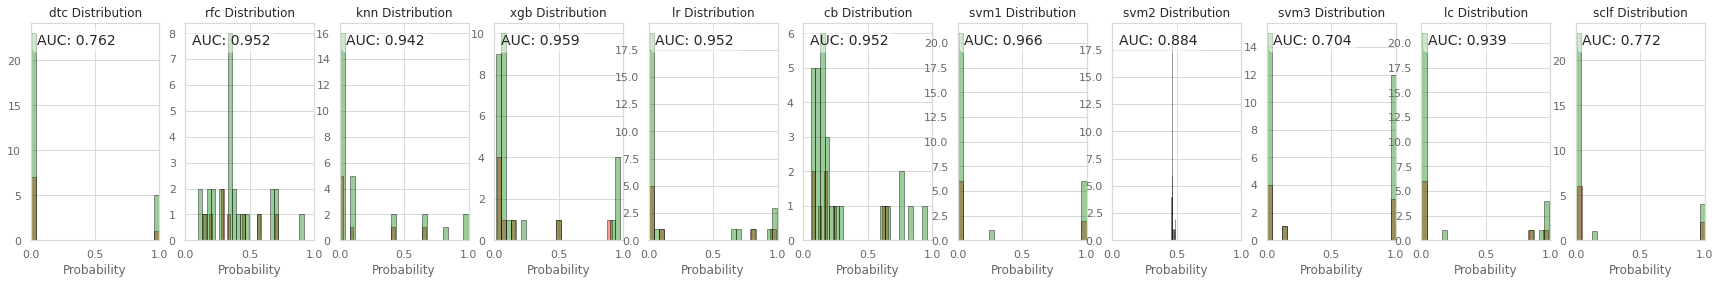

In [ ]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(30, 4), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(12)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False,
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])

    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False,
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])


    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)

    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
# plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 3080)

0.7619047619047619
precision
[0.25 0.8  1.  ]
ax counter
AxesSubplot(0.125,0.125;0.0596154x0.755)
AxesSubplot(0.125,0.125;0.0596154x0.755)
0.9523809523809523
precision
[0.875      0.85714286 0.83333333 0.8        0.75       0.66666667
 0.5        0.         1.        ]
ax counter
AxesSubplot(0.196538,0.125;0.0596154x0.755)
AxesSubplot(0.196538,0.125;0.0596154x0.755)
0.9421768707482993
precision
[0.58333333 0.85714286 0.8        0.66666667 0.5        1.        ]
ax counter
AxesSubplot(0.268077,0.125;0.0596154x0.755)
AxesSubplot(0.268077,0.125;0.0596154x0.755)
0.9591836734693877
precision
[0.875      0.85714286 0.83333333 0.8        0.75       0.66666667
 0.5        1.         1.        ]
ax counter
AxesSubplot(0.339615,0.125;0.0596154x0.755)
AxesSubplot(0.339615,0.125;0.0596154x0.755)
0.9523809523809523
precision
[0.875      0.85714286 0.83333333 0.8        0.75       0.66666667
 0.5        0.         1.        ]
ax counter
AxesSubplot(0.411154,0.125;0.0596154x0.755)
AxesSubplot(0.41115

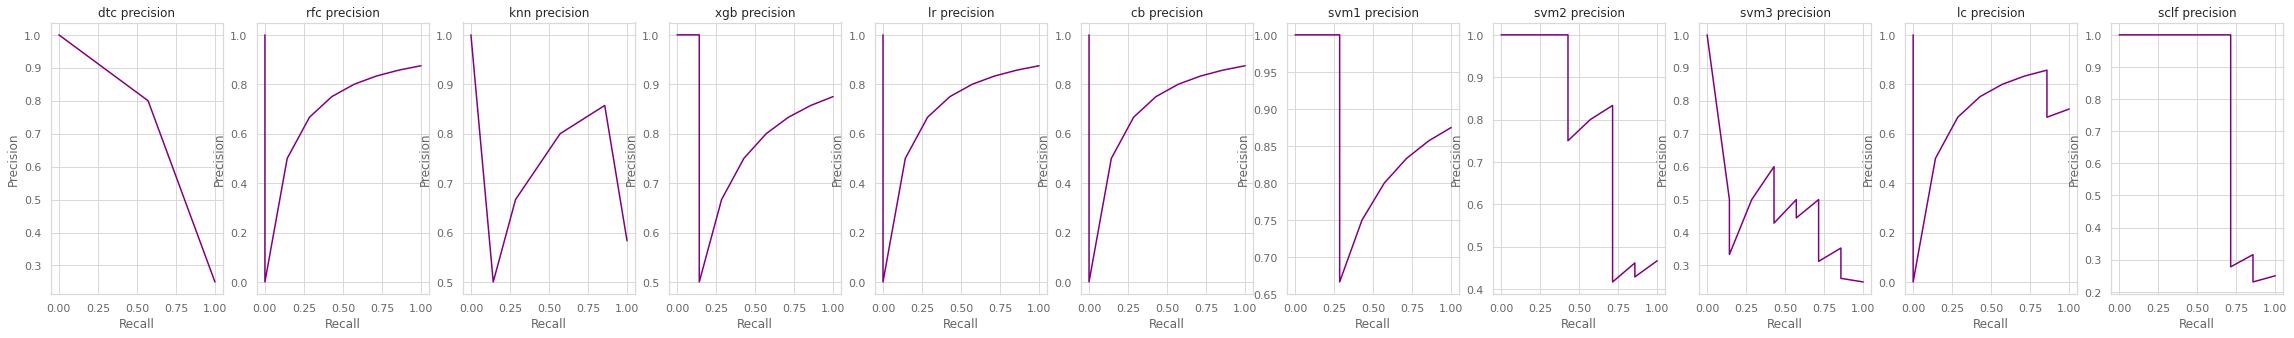

In [ ]:

# f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

# for key, counter in zip(classifiers, range(11)):
#     # Get predictions
#     y_pred = results[key]
#     #calculate precision and recall
#     precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


#     #create precision recall curve
#     ax[counter].plot(recall, precision, color='purple')
#     print(ax[counter])

#     #add axis labels to plot
#     ax[counter].set_title('Precision-Recall Curve')
#     ax[counter].set_ylabel('Precision')
#     ax[counter].set_xlabel('Recall')

#     #display plot
#     plt.show()
# plt.savefig("Precision curve for each Classifier.png", dpi = 1080)
# Probability Distributions Figure
# Set graph style

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    precision1=mean(precision)
    recall1=mean(recall)
    thresholds =mean(thresholds)

    print(auc)
    print("precision")

    print(precision)
    textstr = f"AUC: {auc:.3f}"
    print("ax counter")
    print(ax[counter])
    ax[counter].plot(recall, precision, color='purple')
    # plt.plot(recall, precision, color='purple')

    print(ax[counter])

     #add axis labels to plot
    ax[counter].set_title(f"{key} precision")
    ax[counter].set_ylabel('Precision')
    ax[counter].set_xlabel('Recall')


     #display plot
    # plt.show()
plt.savefig("Precision curve for each Classifier.png", dpi =1600)


    # # Set axis limits and labels
    # ax[counter].set_title(f"{key} Distribution")
    # ax[counter].set_xlim(0,1)
    # ax[counter].set_xlabel("Probability")

#

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cleandata_td/resampled_data/'+'SMOTE+ENN'+'/2010RES.csv')
data
X, y = data[['T',	'TM',	'Tm',	'SLP','H','VV','V','VM']], data['TS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
sclf = StackingCVClassifier(classifiers=[dtc, rfc, knn,lr,gb,svm1,svm2,svm3,lc,xgb],meta_classifier=cb)

In [ ]:
classifiers = {"dtc": dtc,
               "rfc": rfc,
               "knn": knn,
               "lr": lr,
               "svm1": svm1,
               "svm2": svm2,
               "svm3": svm3,
               "lc": lc,
               "gb": gb,
               "xgb":xgb,
               "sclf": sclf}

In [ ]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    # if classifier ==xgb:




    # Fit classifier
    classifier.fit(X.values, y.values)

    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]

    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

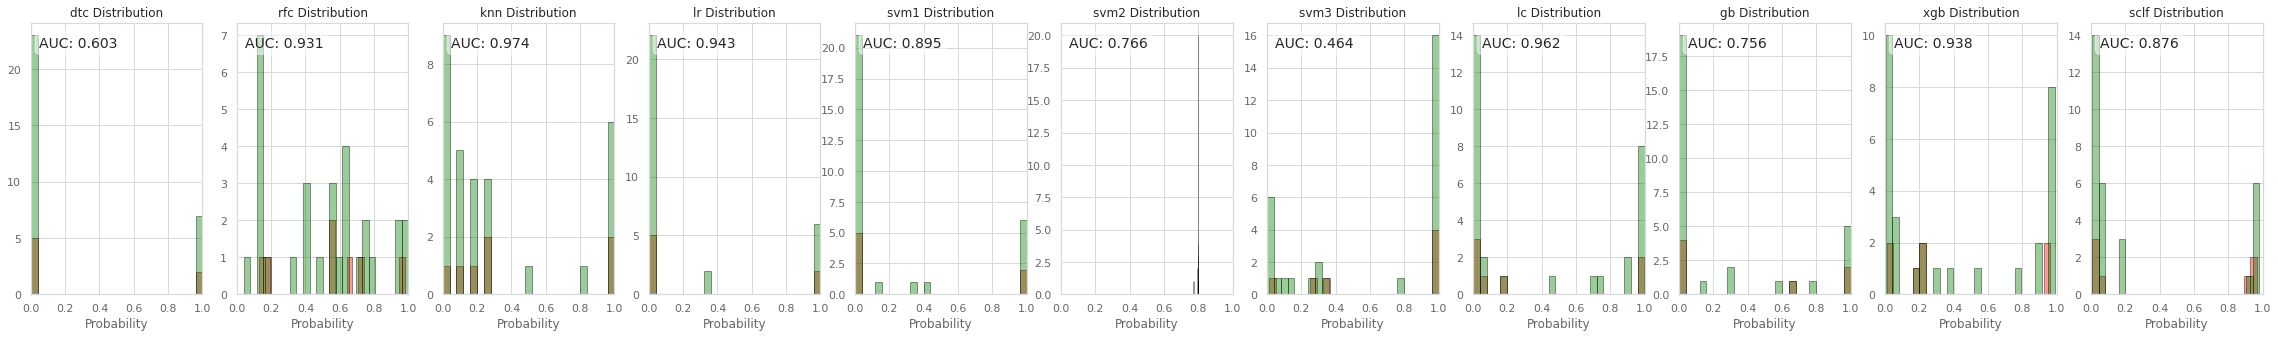

In [ ]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False,
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])

    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False,
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])


    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)

    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
# plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 3080)

0.6028708133971292
precision
[0.36666667 0.57142857 1.        ]
ax counter
AxesSubplot(0.125,0.125;0.0596154x0.755)
AxesSubplot(0.125,0.125;0.0596154x0.755)
0.930622009569378
precision
[0.73333333 0.71428571 0.69230769 0.66666667 0.8        0.875
 0.85714286 1.         1.         1.         1.         1.
 1.        ]
ax counter
AxesSubplot(0.196538,0.125;0.0596154x0.755)
AxesSubplot(0.196538,0.125;0.0596154x0.755)
0.9736842105263158
precision
[0.6875     0.83333333 1.         1.         1.         1.        ]
ax counter
AxesSubplot(0.268077,0.125;0.0596154x0.755)
AxesSubplot(0.268077,0.125;0.0596154x0.755)
0.9425837320574163
precision
[0.64705882 0.625      0.66666667 0.64285714 0.69230769 0.75
 0.81818182 0.9        0.88888889 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
ax counter
AxesSubplot(0.339615,0.125;0.0596154x0.755)
AxesSubplot(0.339615,0.125;0.0596154x0.755)
0.8947368421052632
precision
[0.44       0.41666667 0.43478261 0.45454

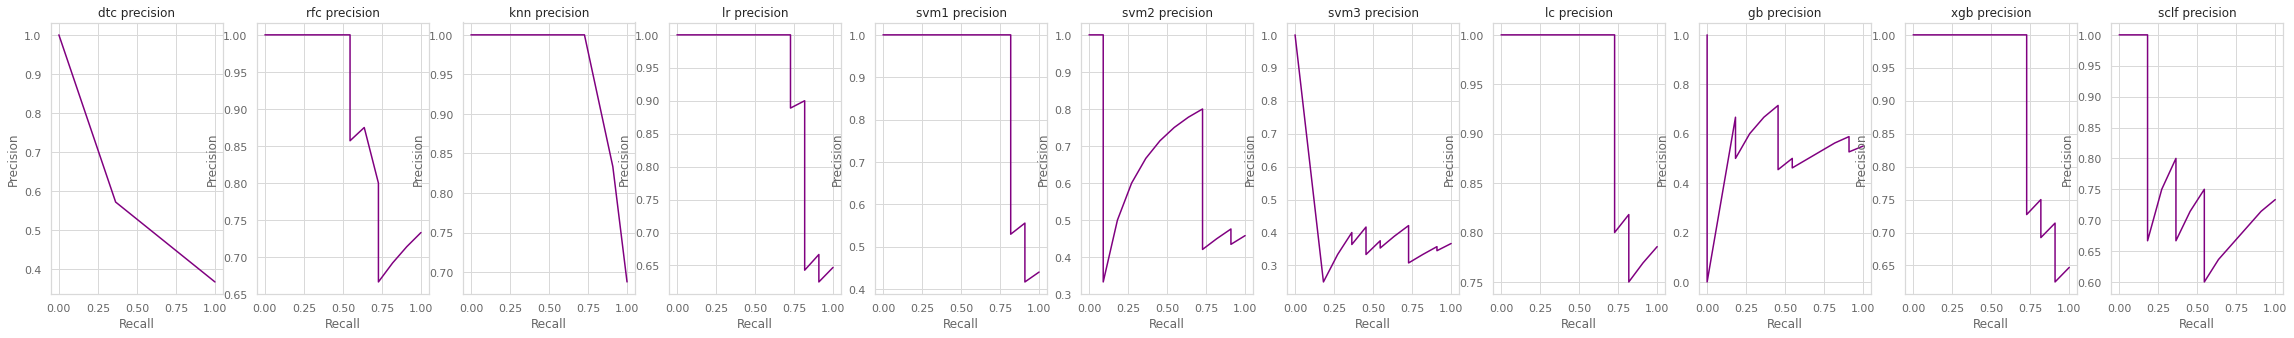

In [ ]:

# f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

# for key, counter in zip(classifiers, range(11)):
#     # Get predictions
#     y_pred = results[key]
#     #calculate precision and recall
#     precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


#     #create precision recall curve
#     ax[counter].plot(recall, precision, color='purple')
#     print(ax[counter])

#     #add axis labels to plot
#     ax[counter].set_title('Precision-Recall Curve')
#     ax[counter].set_ylabel('Precision')
#     ax[counter].set_xlabel('Recall')

#     #display plot
#     plt.show()
# plt.savefig("Precision curve for each Classifier.png", dpi = 1080)
# Probability Distributions Figure
# Set graph style

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    precision1=mean(precision)
    recall1=mean(recall)
    thresholds =mean(thresholds)

    print(auc)
    print("precision")

    print(precision)
    textstr = f"AUC: {auc:.3f}"
    print("ax counter")
    print(ax[counter])
    ax[counter].plot(recall, precision, color='purple')
    # plt.plot(recall, precision, color='purple')

    print(ax[counter])

     #add axis labels to plot
    ax[counter].set_title(f"{key} precision")
    ax[counter].set_ylabel('Precision')
    ax[counter].set_xlabel('Recall')


     #display plot
    # plt.show()
plt.savefig("Precision curve for each Classifier.png", dpi = 1600)


    # # Set axis limits and labels
    # ax[counter].set_title(f"{key} Distribution")
    # ax[counter].set_xlim(0,1)
    # ax[counter].set_xlabel("Probability")

#

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cleandata_td/resampled_data/'+'SMOTE+ENN'+'/2011RES.csv')
data
X, y = data[['T',	'TM',	'Tm',	'SLP','H','VV','V','VM']], data['TS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
sclf = StackingCVClassifier(classifiers=[dtc, rfc, knn,lr,cb,gb,svm2,svm3,lc,xgb],meta_classifier=svm1)

In [ ]:
classifiers = {"dtc": dtc,
               "rfc": rfc,
               "knn": knn,
               "lr": lr,
               "cb": cb,
               "svm2": svm2,
               "svm3": svm3,
               "lc": lc,
               "gb": gb,
               "xgb":xgb,
               "sclf": sclf}

In [ ]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    # if classifier ==xgb:




    # Fit classifier
    classifier.fit(X.values, y.values)

    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]

    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

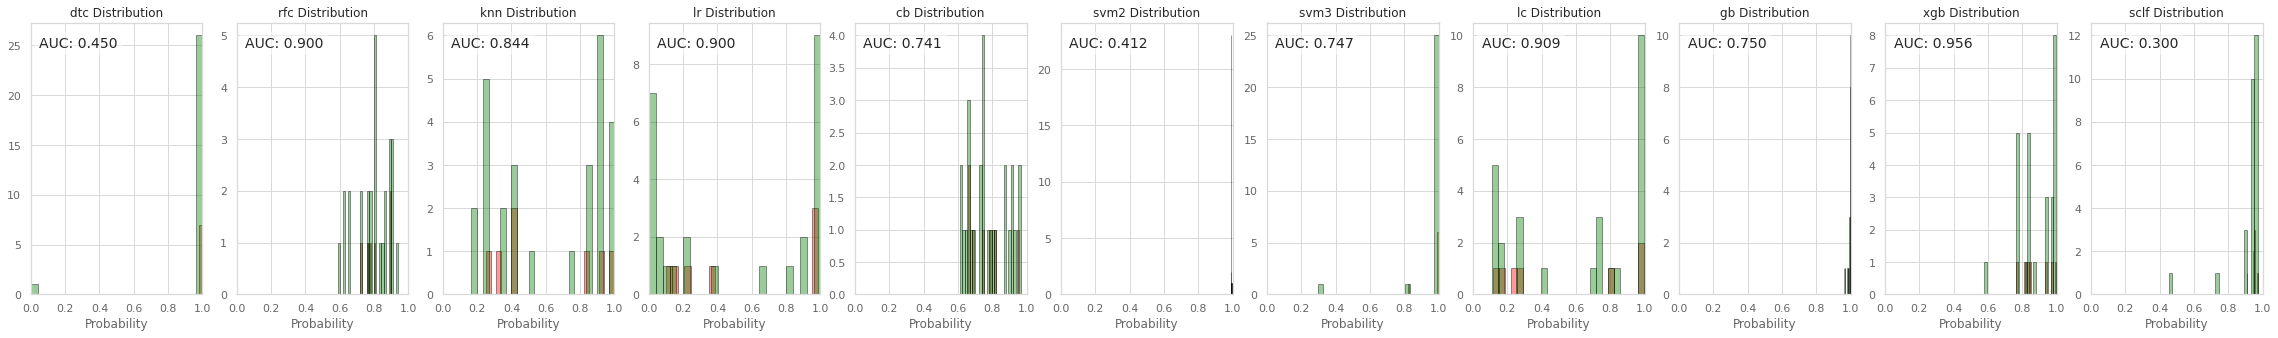

In [ ]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False,
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])

    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False,
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])


    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)

    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
# plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 3080)

In [ ]:

# f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

# for key, counter in zip(classifiers, range(11)):
#     # Get predictions
#     y_pred = results[key]
#     #calculate precision and recall
#     precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


#     #create precision recall curve
#     ax[counter].plot(recall, precision, color='purple')
#     print(ax[counter])

#     #add axis labels to plot
#     ax[counter].set_title('Precision-Recall Curve')
#     ax[counter].set_ylabel('Precision')
#     ax[counter].set_xlabel('Recall')

#     #display plot
#     plt.show()
# plt.savefig("Precision curve for each Classifier.png", dpi = 1080)
# Probability Distributions Figure
# Set graph style

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    precision1=mean(precision)
    recall1=mean(recall)
    thresholds =mean(thresholds)

    print(auc)
    print("precision")

    print(precision)
    textstr = f"AUC: {auc:.3f}"
    print("ax counter")
    print(ax[counter])
    ax[counter].plot(recall, precision, color='purple')
    # plt.plot(recall, precision, color='purple')

    print(ax[counter])

     #add axis labels to plot
    ax[counter].set_title(f"{key} precision")
    ax[counter].set_ylabel('Precision')
    ax[counter].set_xlabel('Recall')


     #display plot
    # plt.show()
plt.savefig("Precision curve for each Classifier.png", dpi = 1600)


    # # Set axis limits and labels
    # ax[counter].set_title(f"{key} Distribution")
    # ax[counter].set_xlim(0,1)
    # ax[counter].set_xlabel("Probability")

#

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cleandata_td/resampled_data/'+'SMOTE+ENN'+'/2014RES.csv')
data
X, y = data[['T',	'TM',	'Tm',	'SLP','H','VV','V','VM']], data['TS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
sclf = StackingCVClassifier(classifiers=[dtc, rfc, knn,lr,cb,gb,svm1,svm2,svm3,xgb],meta_classifier=lc)

In [ ]:
classifiers = {"dtc": dtc,
               "rfc": rfc,
               "knn": knn,
               "lr": lr,
               "cb": cb,
               "svm2": svm2,
               "svm3": svm3,
               "gb": gb,
               "xgb":xgb,
               "sclf": sclf}

In [ ]:
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    # if classifier ==xgb:
    # Fit classifier
    classifier.fit(X.values, y.values)

    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]

    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

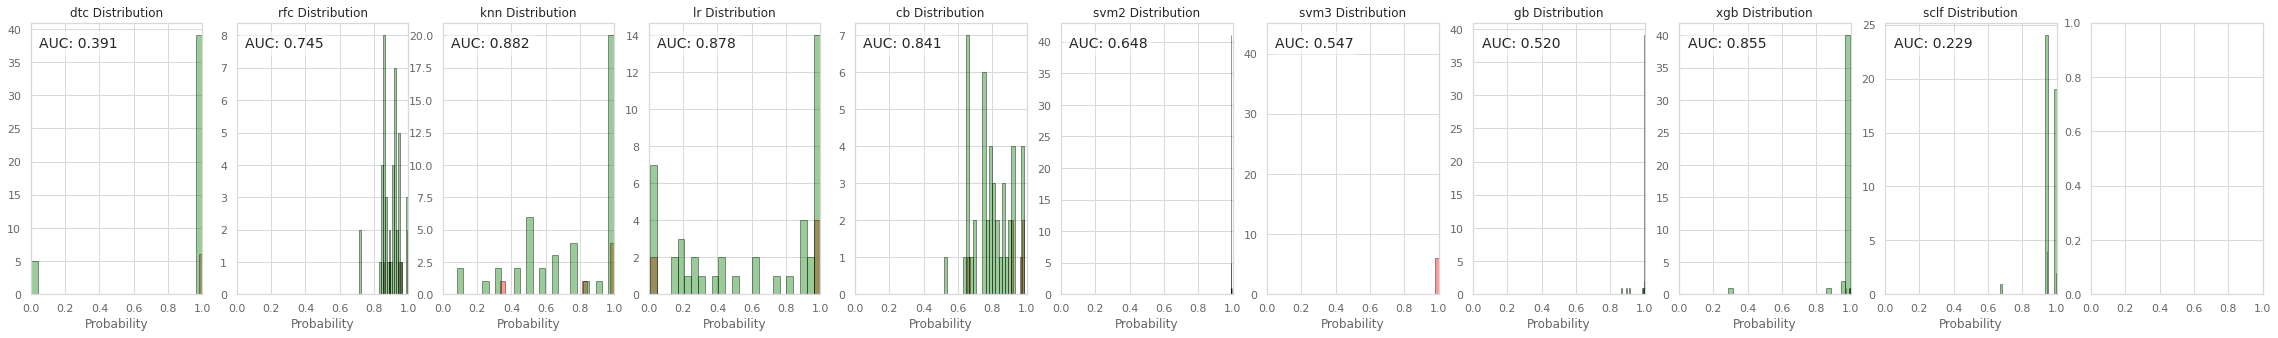

In [ ]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False,
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])

    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False,
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])


    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)

    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
# plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 3080)

0.391304347826087
precision
[0.52272727 0.46153846 1.        ]
ax counter
AxesSubplot(0.125,0.125;0.0596154x0.755)
AxesSubplot(0.125,0.125;0.0596154x0.755)
0.7453416149068323
precision
[0.52272727 0.51162791 0.5        0.51219512 0.56756757 0.625
 0.65517241 0.65384615 0.64       0.60869565 0.63636364 0.72222222
 0.92307692 1.         1.         1.         1.         1.        ]
ax counter
AxesSubplot(0.196538,0.125;0.0596154x0.755)
AxesSubplot(0.196538,0.125;0.0596154x0.755)
0.8819875776397516
precision
[0.62162162 0.70967742 0.75862069 0.80769231 0.86363636 0.85714286
 0.85       1.        ]
ax counter
AxesSubplot(0.268077,0.125;0.0596154x0.755)
AxesSubplot(0.268077,0.125;0.0596154x0.755)
0.8778467908902692
precision
[0.52272727 0.51162791 0.52380952 0.53658537 0.55       0.56410256
 0.57894737 0.59459459 0.58333333 0.6        0.58823529 0.60606061
 0.625      0.64516129 0.66666667 0.68965517 0.71428571 0.74074074
 0.76923077 0.8        0.79166667 0.82608696 0.86363636 0.9047619
 0.9

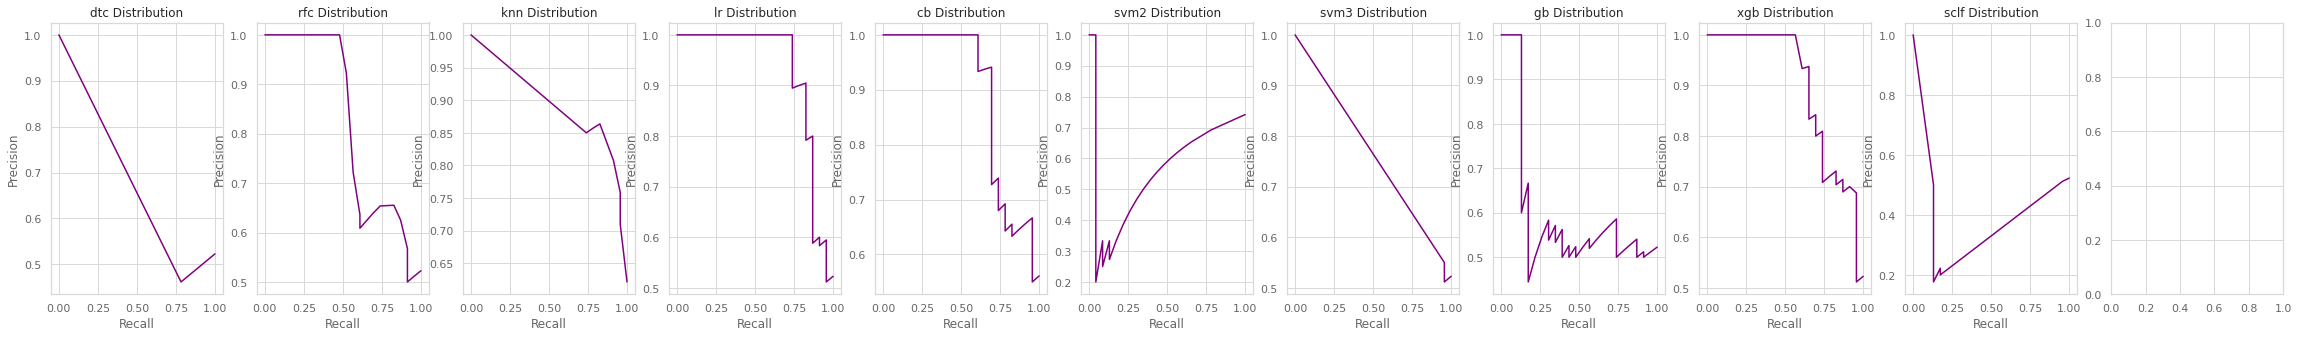

In [ ]:

# f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

# for key, counter in zip(classifiers, range(11)):
#     # Get predictions
#     y_pred = results[key]
#     #calculate precision and recall
#     precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


#     #create precision recall curve
#     ax[counter].plot(recall, precision, color='purple')
#     print(ax[counter])

#     #add axis labels to plot
#     ax[counter].set_title('Precision-Recall Curve')
#     ax[counter].set_ylabel('Precision')
#     ax[counter].set_xlabel('Recall')

#     #display plot
#     plt.show()
# plt.savefig("Precision curve for each Classifier.png", dpi = 1080)
# Probability Distributions Figure
# Set graph style

# Plot
f, ax = plt.subplots(figsize=(40, 5), nrows=1, ncols = 11)

for key, counter in zip(classifiers, range(11)):
    # Get predictions
    y_pred = results[key]

    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    precision1=mean(precision)
    recall1=mean(recall)
    thresholds =mean(thresholds)

    print(auc)
    print("precision")

    print(precision)
    textstr = f"AUC: {auc:.3f}"
    print("ax counter")
    print(ax[counter])
    ax[counter].plot(recall, precision, color='purple')
    # plt.plot(recall, precision, color='purple')

    print(ax[counter])

     #add axis labels to plot
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_ylabel('Precision')
    ax[counter].set_xlabel('Recall')


     #display plot
    # plt.show()
plt.savefig("Precision curve for each Classifier.png", dpi = 1600)


    # # Set axis limits and labels
    # ax[counter].set_title(f"{key} Distribution")
    # ax[counter].set_xlim(0,1)
    # ax[counter].set_xlabel("Probability")

#